In [1]:
import os
import numpy as np
from astropy import units as u 
from astropy import coordinates
from astropy.io import fits
import matplotlib.pyplot as plt
import aplpy

%matplotlib inline

In [2]:
imagename = '../compareImage/images/J0423-0120_B6.fits'

In [3]:
hdu_list = fits.open(imagename)

In [4]:
hdu_list.info()

Filename: ../compareImage/images/J0423-0120_B6.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU    2203   (1200, 1200, 1, 1)   float32   


In [5]:
image_data = hdu_list[0].data

In [6]:
print type(image_data)
print image_data.shape

<type 'numpy.ndarray'>
(1, 1, 1200, 1200)


In [7]:
image_data[0][0].shape

(1200, 1200)

In [8]:
img = image_data[0][0]

In [9]:
type(img)

numpy.ndarray

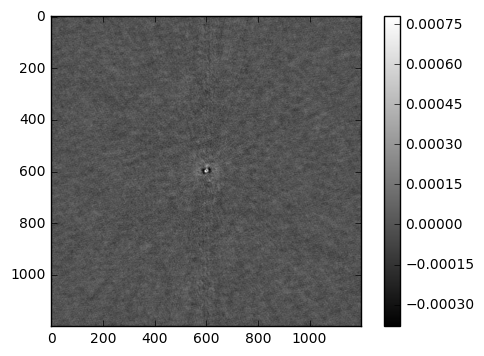

In [10]:
plt.imshow(img, cmap='gray')
plt.colorbar()

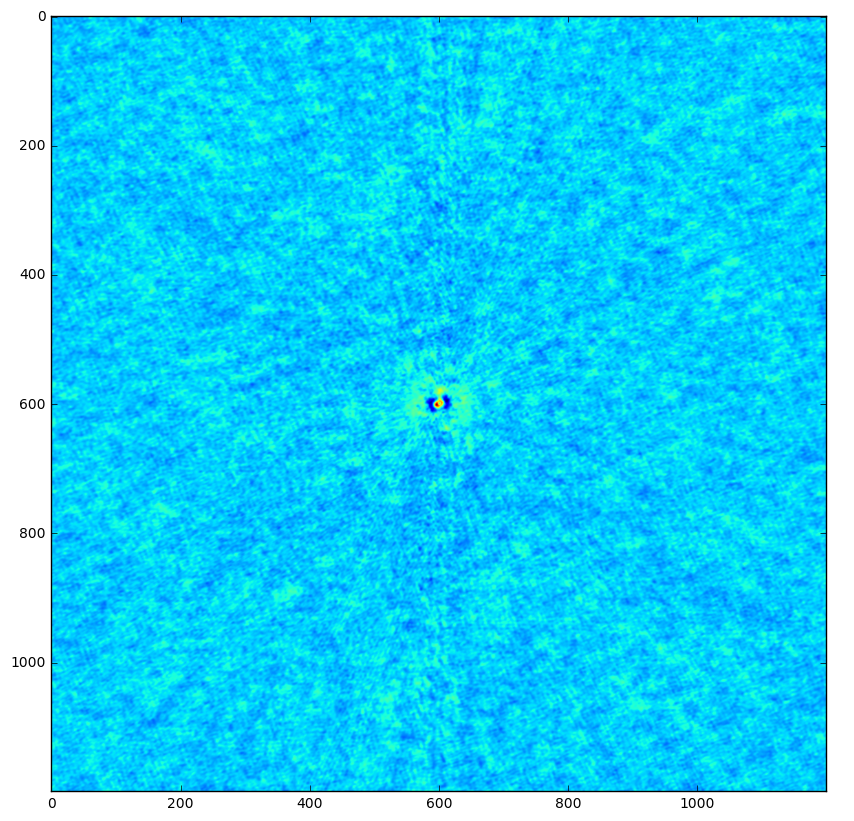

In [11]:
plt.figure(figsize=(10,10))
plt.imshow(img)

# I chose the tick marks based on the histogram above
# cbar = plt.colorbar(ticks=[3e-05,12e-05,3e-03])
# cbar.ax.set_yticklabels([3e-05,12e-05,3e-03])

In [12]:
from wavelet import wt
wt = wt()

In [13]:
result = wt.atrous(img, 6)

##WT--A Trous--Plane: 6
##WT--A Trous--Plane: 5
##WT--A Trous--Plane: 4
##WT--A Trous--Plane: 3
##WT--A Trous--Plane: 2
##WT--A Trous--Plane: 1
##WT--A Trous--Plane: 0


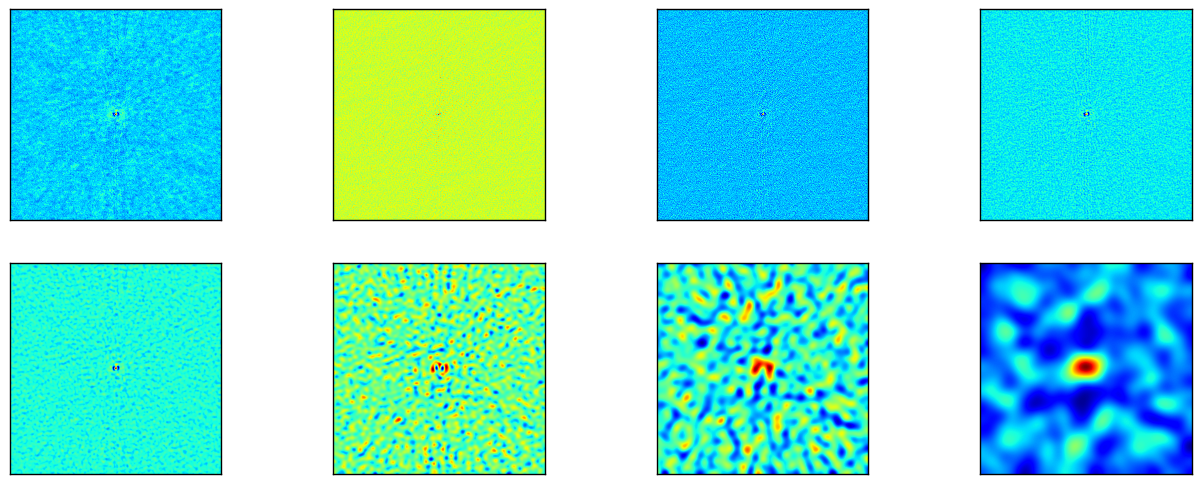

In [14]:
plt.figure(figsize=(16,6))

plt.subplot(241)
plt.imshow(img)
plt.xticks([]), plt.yticks([])
for i,lvl in enumerate(result):
    plt.subplot(24*10+i+2)
    plt.imshow(lvl)
    plt.xticks([]), plt.yticks([])

plt.show()

In [15]:
filteredplane = wt.filtering(result, threshold=3, mask=(0, 768, 0, 768))
#filteredplane = wt.filtering(result, waveletNoise=True, imageNoise = 3.5E-05)

#WT-- Image Filtering
#WT-- Filtering to be checked
##WT--Plane 6 Sigma = 5.293539e-06
##WT--Pixel filtered : 1436033
##WT--Plane 5 Sigma = 1.039333e-05
##WT--Pixel filtered : 1436330
##WT--Plane 4 Sigma = 1.063464e-05
##WT--Pixel filtered : 1436453
##WT--Plane 3 Sigma = 9.051898e-06
##WT--Pixel filtered : 1436228
##WT--Plane 2 Sigma = 6.089409e-06
##WT--Pixel filtered : 1434609
##WT--Plane 1 Sigma = 3.509088e-06
##WT--Pixel filtered : 1433591


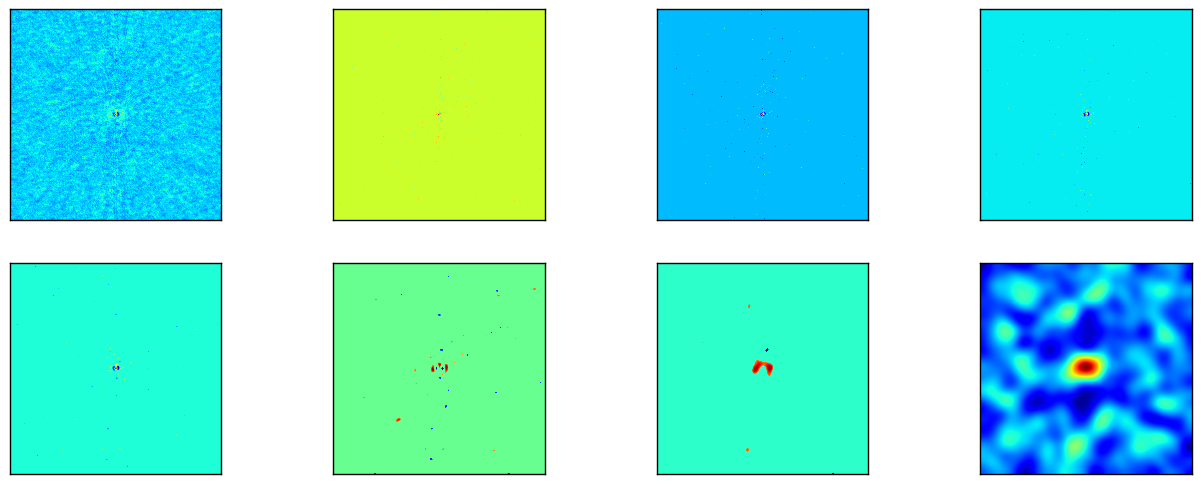

In [16]:
plt.figure(figsize=(16,6))

plt.subplot(241)
plt.imshow(img)
plt.xticks([]), plt.yticks([])
for i,lvl in enumerate(filteredplane):
    plt.subplot(24*10+i+2)
    plt.imshow(lvl)
    plt.xticks([]), plt.yticks([])

plt.show()

In [17]:
filtered = wt.restore(filteredplane, 0, 6)

##WT--Restore-plane: 0 to 6
##WT--Restore-plane: 0
##WT--Restore-plane: 1
##WT--Restore-plane: 2
##WT--Restore-plane: 3
##WT--Restore-plane: 4
##WT--Restore-plane: 5
##WT--Restore-plane: 6


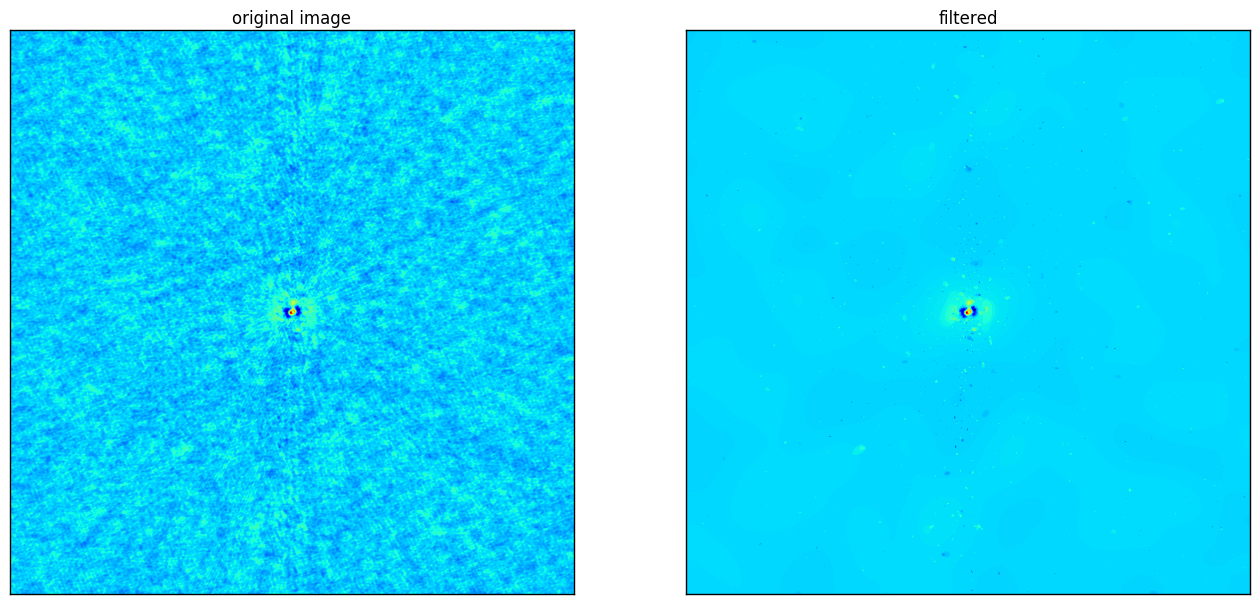

In [18]:
plt.figure(figsize=(16,12))

plt.subplot(121)
plt.imshow(img)
plt.title("original image")
plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.title("filtered")
plt.imshow(filtered)
plt.xticks([]), plt.yticks([])

plt.show()

In [19]:
hdu_list[0].data[0][0] = filtered
hdu_list.writeto('J0423-0120_B6_filtered.fits')

INFO: Setting slices=[0, 0] [aplpy.core]
INFO: Auto-setting vmin to -3.147e-05 [aplpy.core]
INFO: Auto-setting vmax to  5.989e-05 [aplpy.core]


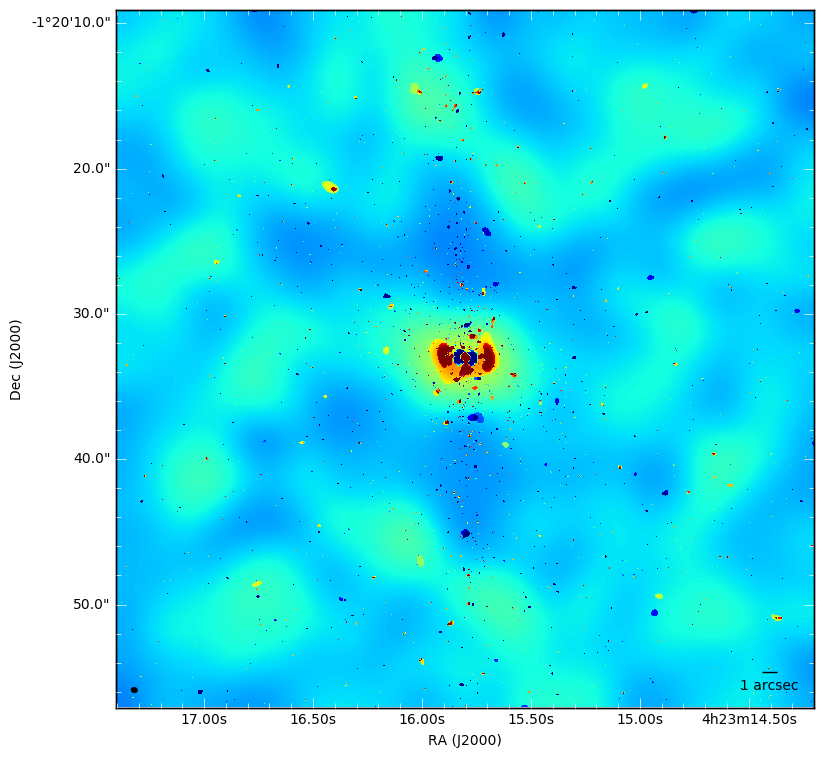

In [21]:
fig = aplpy.FITSFigure('J0423-0120_B6_filtered.fits')
fig.add_beam()
fig.beam.set_color('black')
fig.add_scalebar(1 * u.arcsecond)
fig.scalebar.set_label('1 arcsec')
fig.scalebar.set_color("black")
fig.show_colorscale()